In [1]:
# Claidheadh Mor 0.1
# Compare various articles with a tSNE dimensional reduction of a "bag of words" representation

In [2]:
# 0. Import necessary packages and define functions for backpropagation and unsupervised learning with RBMs.  

# Import numpy, natch
import numpy as np
# For tic-toc funcitonality
import time

# Set up plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# For getting websites 
import urllib.request
import urllib
from urllib.error import HTTPError

from bs4 import BeautifulSoup as bs
#help(urllib.request)


In [3]:
# make an array of web addresses for coverage you want to compare
#aLIGO third black hole merger detection
myAddys = ['https://www.ligo.caltech.edu/page/press-release-gw170104']
myAddys.append('http://www.thehindu.com/sci-tech/science/us-lab-ligo-strikes-again-detects-a-third-gravitational-wave-merger/article18700551.ece')
myAddys.append('https://richarddawkins.net/2017/06/ligos-third-detection-hints-at-how-black-hole-binaries-are-born/')
myAddys.append('http://www.caltech.edu/news/ligo-detects-gravitational-waves-third-time-78193')
myAddys.append('https://phys.org/news/2017-06-gravitational-insight-black-holes.html')
myAddys.append('https://www.nytimes.com/2017/06/01/science/black-holes-collision-ligo-gravitational-waves.html')
myAddys.append('https://news.northwestern.edu/stories/2017/june/ligo-detects-gravitational-waves-for-third-time/')
myAddys.append('https://www.newscientist.com/article/2133353-ligos-third-detection-hints-at-how-black-hole-binaries-are-born/')
# CRISPR used for editing human embryos in US
myAddys.append('https://www.washingtonpost.com/news/to-your-health/wp/2017/08/02/first-human-embryo-editing-experiment-in-u-s-corrects-gene-for-heart-condition/')
myAddys.append('http://news.nationalgeographic.com/2017/08/human-embryos-gene-editing-crispr-us-health-science/')
myAddys.append('https://www.geekwire.com/2017/oregon-team-uses-crispr-editing-fix-gene-linked-heart-disease-embryos/')
#myAddys.append('https://techcrunch.com/2017/08/02/bravenewcrisprdworld/')
myAddys.append('https://www.sciencenews.org/article/crispr-gene-editing-human-embryos')
myAddys.append('https://futurism.com/first-u-s-human-embryo-gene-editing-experiment-successfully-corrects-a-heart-condition/')
myAddys.append('http://www.nature.com/news/crispr-fixes-disease-gene-in-viable-human-embryos-1.22382')
myAddys.append('http://www.medicaldaily.com/crispr-gene-editing-technology-removes-heart-disease-mutation-embryos-420977')


myScrapes = ['']
myText = ''
for addy in myAddys:
    print(addy)
    #myURL = urllib.request.urlopen(addy)
    req = urllib.request.Request(url=addy,headers={'User-Agent':' Mozilla/5.0 (Windows NT 6.1; WOW64; rv:12.0) Gecko/20100101 Firefox/12.0'})
    try:
        handler = urllib.request.urlopen(req)
    except HTTPError as e:
        content = e.read()
    myURL = handler #urllib.request.urlopen(myAddy)

    myTest = myURL.read()
    soup = bs(myTest, 'html.parser')
    soupText = soup.get_text()
    myText = myText + soupText
    myScrapes.append(soupText)
    # Scrape all the text into one big string to build the BOW from
myText = ''
for addy in myAddys:
    print(addy)
    #myURL = urllib.request.urlopen(addy)
    req = urllib.request.Request(url=addy,headers={'User-Agent':' Mozilla/5.0 (Windows NT 6.1; WOW64; rv:12.0) Gecko/20100101 Firefox/12.0'})
    try:
        handler = urllib.request.urlopen(req)
    except HTTPError as e:
        content = e.read()
    myURL = handler #urllib.request.urlopen(myAddy)

    myTest = myURL.read()
    soup = bs(myTest, 'html.parser')
    myText = myText + soup.get_text()
    # Create a dictionary bag-of-words for 
wordcount = {}
weirdChar = ['[','{',']','}',':',';','%','/','/','.filename','-','+','=']



for word in myText.split():
    # Check for weird character
    dontAdd = 1
    for wChar in weirdChar:
        if(word.find(wChar) != -1):
            wordcount = wordcount
            dontAdd = 0
            #print('weird character detected')
    # Add word to wordcount dictionary if it seems to be a real weird. 
    if (dontAdd):
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
print(len(wordcount))

if(0):
    for k, v in wordcount.items():
        print(k,v)

# Build bag-of-words Dictionary based on the combined job descriptions
bowDict = {}
for word in wordcount:
    bowDict[word] = 0  
    myTemp = bowDict
X = np.array([[1]])
print(X)
a0 = np.array([[0],[0]])
print(a0)
print(len((a0[1])))

if(1):
    for jd in myScrapes:
        # Scan through each word in each job description, add to worcount vectors for each entry
        for word in jd:
            if word in myTemp:
                myTemp[word] += 1
        # store the BOW vector in the input vector
        X = np.array([[1]])
        for k, v in myTemp.items():
        #    print(k,v)
            X = np.append(X,[[v]],1)
        #print(np.shape(X))
        if (len((a0[0])) > 2):
            #print('etet')
            #print(np.shape(a0))
            #print(np.shape(X))
            a0 = (np.append(a0,X,0))
        else:
            #print('adfad')
            #print(np.shape(a0))
            a0 = X
            #print((np.shape(a0)))
            #print(np.shape(a0))
                

print(np.shape(a0))  
def sigmoid(z):
    #Returns the logistic of the value z
    mySig = 1 / (1+np.exp(-z))
    return mySig

print(np.mean(a0))

myMax = np.median(a0)

print(myMax)
a00 = a0
a0 = a0 / (np.mean(a0) * 2)

print(np.shape(a0))


https://www.ligo.caltech.edu/page/press-release-gw170104
http://www.thehindu.com/sci-tech/science/us-lab-ligo-strikes-again-detects-a-third-gravitational-wave-merger/article18700551.ece
https://richarddawkins.net/2017/06/ligos-third-detection-hints-at-how-black-hole-binaries-are-born/
http://www.caltech.edu/news/ligo-detects-gravitational-waves-third-time-78193
https://phys.org/news/2017-06-gravitational-insight-black-holes.html
https://www.nytimes.com/2017/06/01/science/black-holes-collision-ligo-gravitational-waves.html
https://news.northwestern.edu/stories/2017/june/ligo-detects-gravitational-waves-for-third-time/
https://www.newscientist.com/article/2133353-ligos-third-detection-hints-at-how-black-hole-binaries-are-born/
https://www.washingtonpost.com/news/to-your-health/wp/2017/08/02/first-human-embryo-editing-experiment-in-u-s-corrects-gene-for-heart-condition/
http://news.nationalgeographic.com/2017/08/human-embryos-gene-editing-crispr-us-health-science/
https://www.geekwire.com

In [8]:
print(np.shape(a0))

print(np.shape(a0))

(16, 200)
(16, 200)


In [7]:
%store a0

Stored 'a0' (ndarray)


In [ ]:
#https://github.com/oreillymedia/t-SNE-tutorial
import sklearn
from sklearn.manifold import TSNE

myModel = TSNE(n_components=2,random_state=0)
myTest = myModel.fit_transform(a0)
tsneBOW = TSNE(random_state=1).fit_transform(a0)

In [14]:
help(TSNE)

Help on class TSNE in module sklearn.manifold.t_sne:

class TSNE(sklearn.base.BaseEstimator)
 |  t-distributed Stochastic Neighbor Embedding.
 |  
 |  t-SNE [1] is a tool to visualize high-dimensional data. It converts
 |  similarities between data points to joint probabilities and tries
 |  to minimize the Kullback-Leibler divergence between the joint
 |  probabilities of the low-dimensional embedding and the
 |  high-dimensional data. t-SNE has a cost function that is not convex,
 |  i.e. with different initializations we can get different results.
 |  
 |  It is highly recommended to use another dimensionality reduction
 |  method (e.g. PCA for dense data or TruncatedSVD for sparse data)
 |  to reduce the number of dimensions to a reasonable amount (e.g. 50)
 |  if the number of features is very high. This will suppress some
 |  noise and speed up the computation of pairwise distances between
 |  samples. For more tips see Laurens van der Maaten's FAQ [2].
 |  
 |  Read more in the 

In [ ]:

myModel = TSNE(n_components=2,random_state=0)
#myTest = myModel.fit_transform(a0)

(16, 8578)


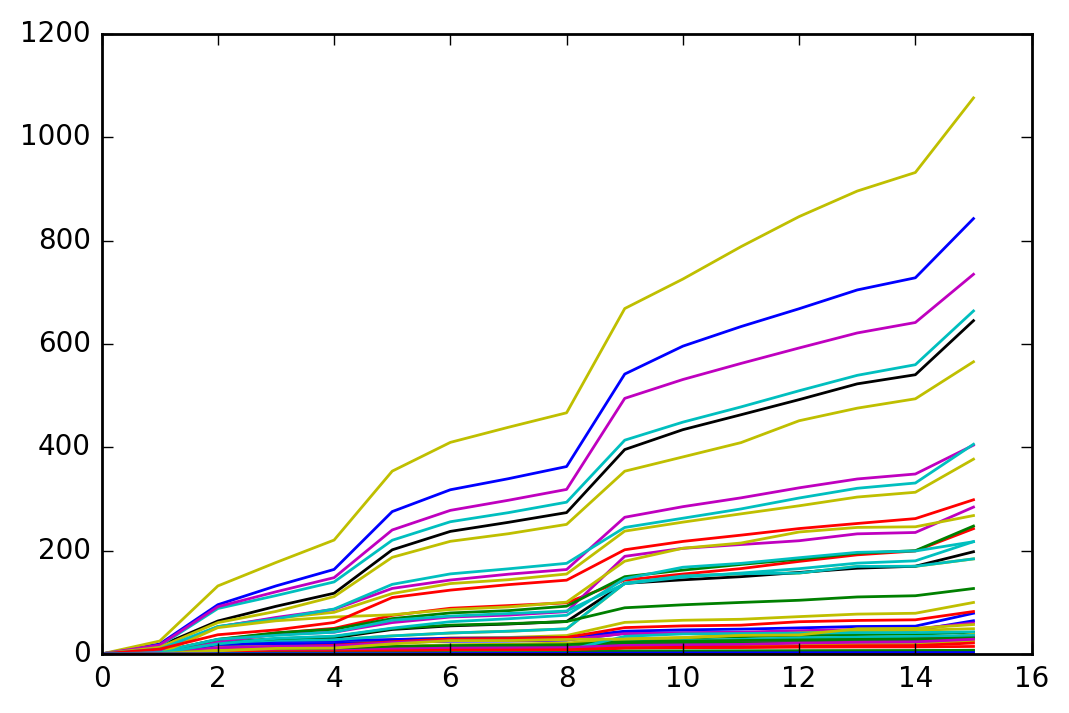

In [15]:

print(np.shape(a0))
plt.figure()
plt.plot(a0)
plt.show()

In [11]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=20, c=None, marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)
    Make a scatter plot of x vs y, where x and y are sequence like objects
    of the same length.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data
    
    s : scalar or array_like, shape (n, ), optional, default: 20
        size in points^2.
    
    c : color, sequence, or sequence of color, optional, default: 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs
        (see below). Note that `c` should not be a single numeric RGB or
        RGBA sequence because that is indistinguishable from an array of
        values to be colormapped.  `c` can be a